# Support vector machine exemple

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

## Data

In [2]:
# Charger le dataset Wine
wine = load_wine()
X = wine.data  # Caractéristiques des vins
y = wine.target  # Classes des vins (types de vins)
feature_names = wine.feature_names  # Noms des caractéristiques

### Visualisation

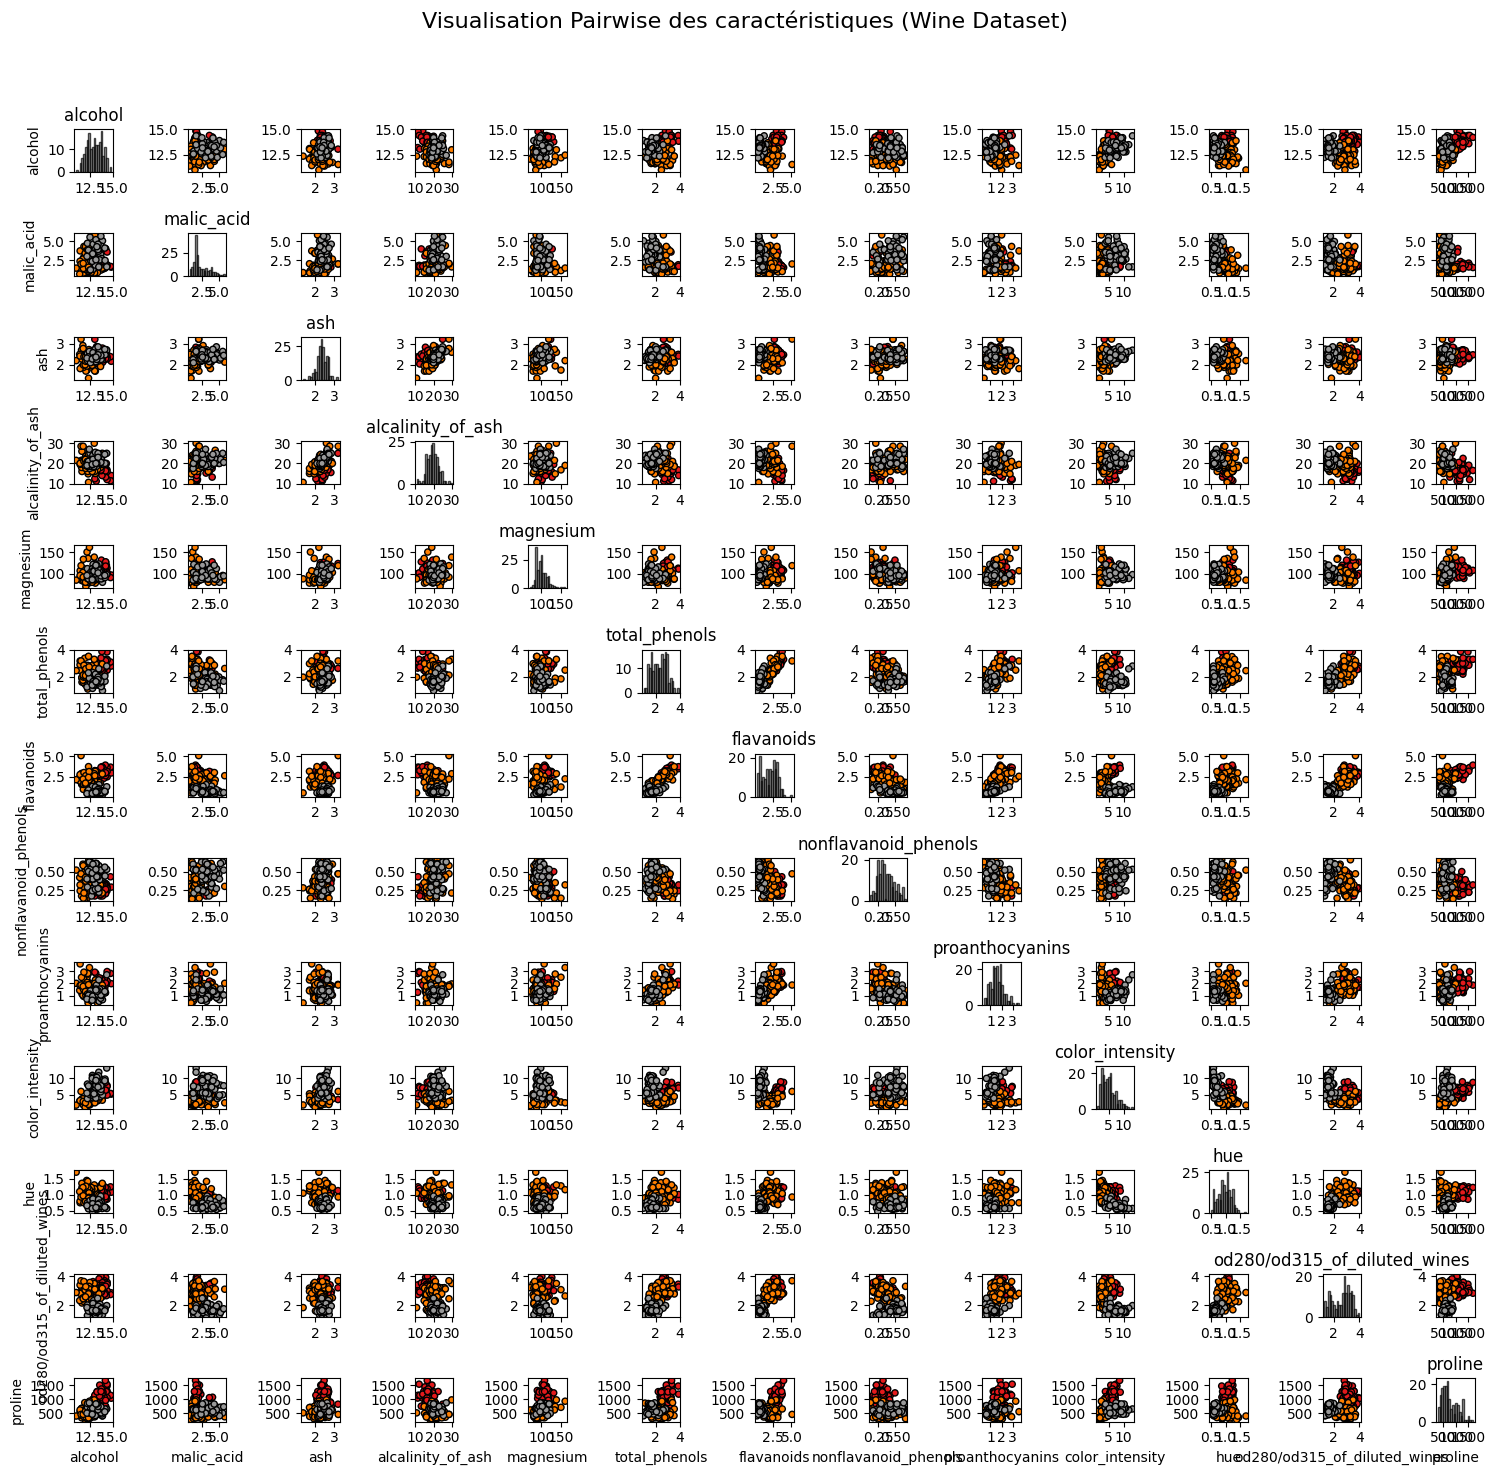

In [12]:
# Nombre de caractéristiques
n_features = X.shape[1]

# Créer une grille de sous-graphiques pour toutes les combinaisons de caractéristiques
fig, axes = plt.subplots(n_features, n_features, figsize=(15, 15))
fig.suptitle("Visualisation Pairwise des caractéristiques (Wine Dataset)", fontsize=16)

# Afficher chaque paire de caractéristiques
for i in range(n_features):
    for j in range(n_features):
        ax = axes[i, j]
        if i == j:
            # Diagonal : Histogramme d'une seule caractéristique
            ax.hist(X[:, i], bins=20, color='gray', edgecolor='black', alpha=0.7)
            ax.set_title(f"{feature_names[i]}")
        else:
            # Scatter plot pour les paires de caractéristiques
            scatter = ax.scatter(X[:, j], X[:, i], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
        
        # Labels des axes
        if i == n_features - 1:
            ax.set_xlabel(feature_names[j])
        if j == 0:
            ax.set_ylabel(feature_names[i])

# Ajuster la disposition
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


La même chose mais avec un nombre de features réduit

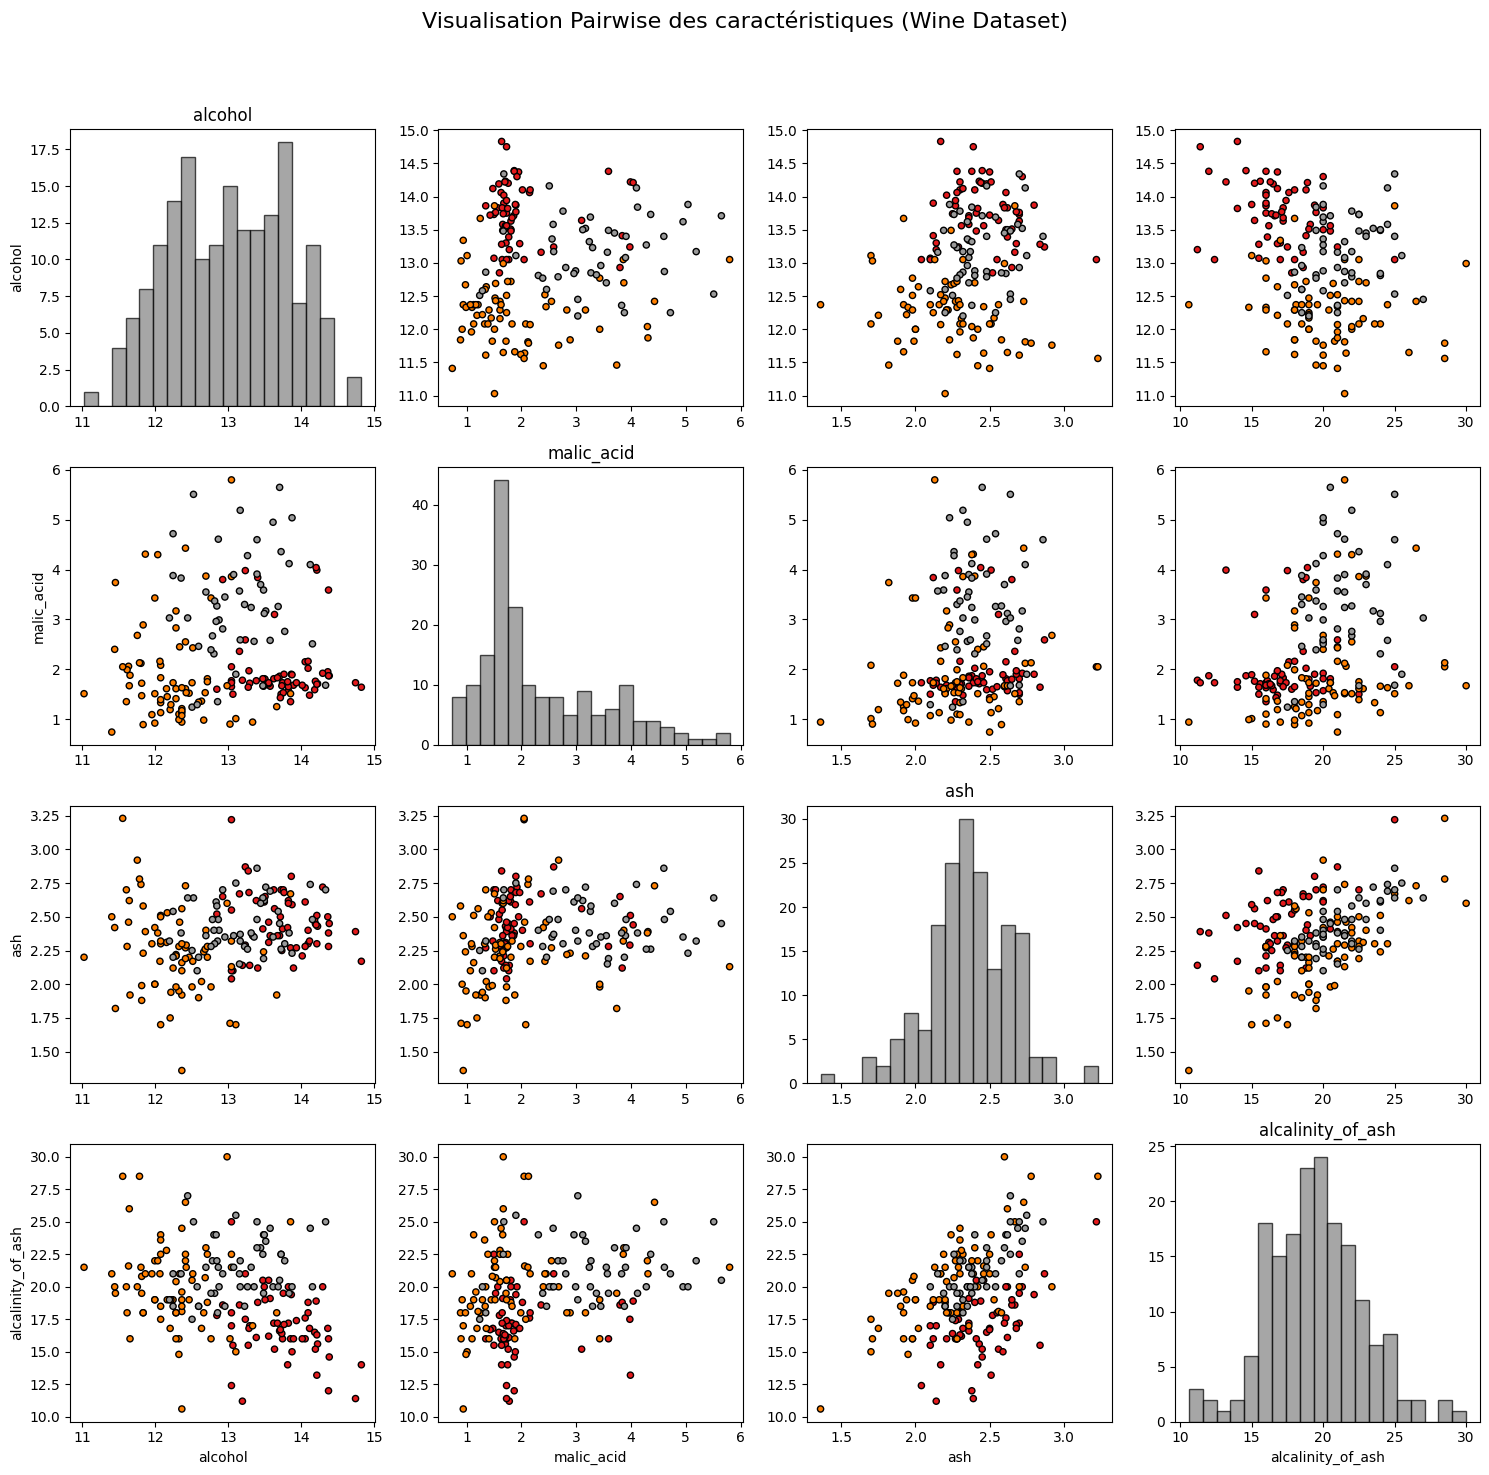

In [13]:
# Nombre de caractéristiques
n_features = int(X.shape[1]/3)

# Créer une grille de sous-graphiques pour toutes les combinaisons de caractéristiques
fig, axes = plt.subplots(n_features, n_features, figsize=(15, 15))
fig.suptitle("Visualisation Pairwise des caractéristiques (Wine Dataset)", fontsize=16)

# Afficher chaque paire de caractéristiques
for i in range(n_features):
    for j in range(n_features):
        ax = axes[i, j]
        if i == j:
            # Diagonal : Histogramme d'une seule caractéristique
            ax.hist(X[:, i], bins=20, color='gray', edgecolor='black', alpha=0.7)
            ax.set_title(f"{feature_names[i]}")
        else:
            # Scatter plot pour les paires de caractéristiques
            scatter = ax.scatter(X[:, j], X[:, i], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
        
        # Labels des axes
        if i == n_features - 1:
            ax.set_xlabel(feature_names[j])
        if j == 0:
            ax.set_ylabel(feature_names[i])

# Ajuster la disposition
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Division

In [3]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model

In [4]:
# Appliquer un SVM (Support Vector Machine) sur les données d'entraînement
clf = SVC(kernel='linear', random_state=0)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Tests

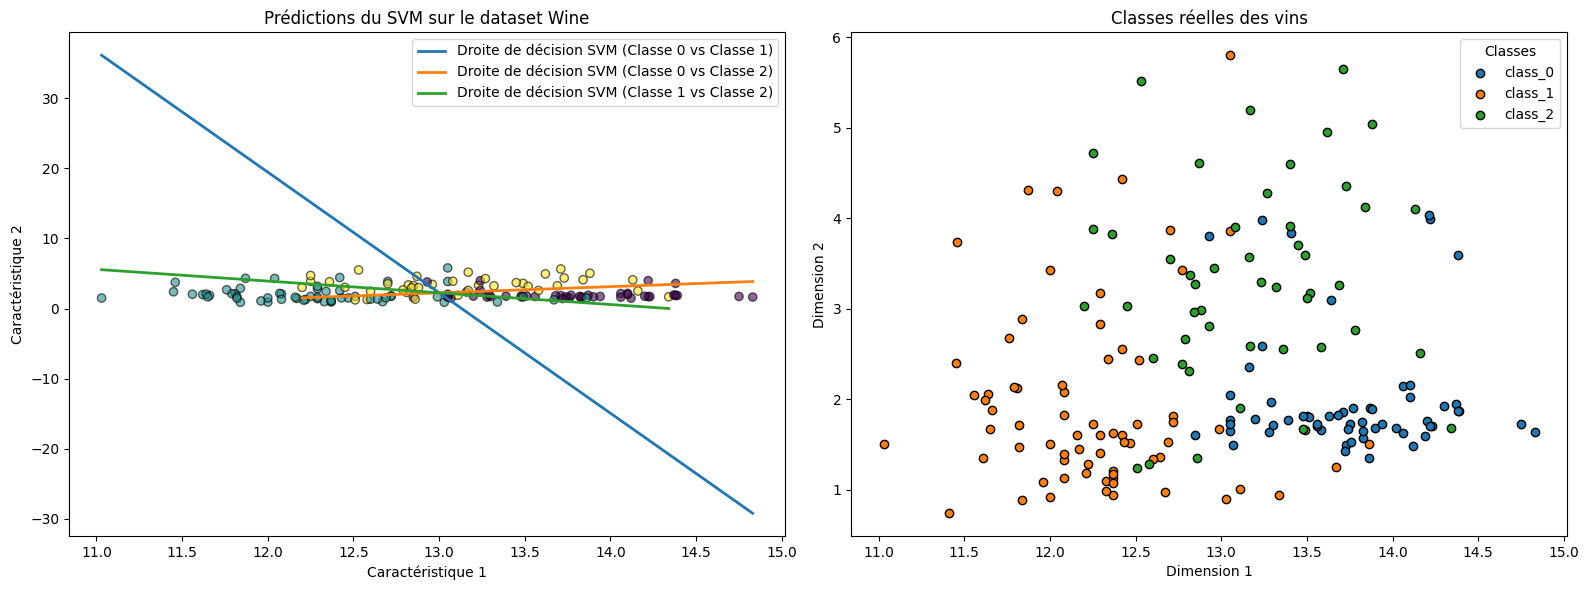

In [12]:
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Premier graphique : Prédictions avec le SVM
y_pred = clf.predict(X_train)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_pred, edgecolor="k", marker='o', alpha=0.6)
axes[0].set_title('Prédictions du SVM sur le dataset Wine')
axes[0].set_xlabel('Caractéristique 1')
axes[0].set_ylabel('Caractéristique 2')

# Afficher les droites de décision du SVM pour toutes les classes
for i in range(3):
    for j in range(i + 1, 3):
        # Sélectionner les données des classes i et j
        X_train_2class = X_train[(y_train == i) | (y_train == j)]
        y_train_2class = y_train[(y_train == i) | (y_train == j)]
        
        # Appliquer un SVM binaire entre les classes i et j
        clf_2class = SVC(kernel='linear', random_state=0)
        clf_2class.fit(X_train_2class[:, :2], y_train_2class)  # Utiliser seulement les deux premières caractéristiques
        
        # Calculer la droite de décision pour ces deux classes
        xx = np.linspace(X_train_2class[:, 0].min(), X_train_2class[:, 0].max(), 100)  # Générer des points le long de l'axe x
        yy = -(clf_2class.coef_[0, 0] * xx + clf_2class.intercept_) / clf_2class.coef_[0, 1]  # Calculer les points sur la droite de décision
        
        axes[0].plot(xx, yy, label=f'Droite de décision SVM (Classe {i} vs Classe {j})', lw=2)

axes[0].legend()

# Deuxième graphique : Visualisation des classes réelles
feature_indices = (0, 1)  # Première et deuxième caractéristiques
class_labels = wine.target_names
for class_index, class_label in enumerate(class_labels):
    axes[1].scatter(
        X[y == class_index, feature_indices[0]],
        X[y == class_index, feature_indices[1]],
        label=class_label,
        edgecolor='k',
    )
axes[1].set_xlabel(f"Dimension {feature_indices[0] + 1}")
axes[1].set_ylabel(f"Dimension {feature_indices[1] + 1}")
axes[1].set_title("Classes réelles des vins")
axes[1].legend(title="Classes")

# Afficher les deux graphiques
plt.tight_layout()
plt.show()

#### Affichage des résultats

In [13]:
# Afficher les classes apprises par le SVM
print("Classes apprises : ")
print(clf.classes_)

# Afficher les labels des prédictions (ou étiquettes prédites) pour l'ensemble de test
print("Prédictions sur l'ensemble de test : ")
print(y_pred)

# Afficher les coefficients du SVM (l'hyperplan linéaire)
print("Coefficients du SVM : ")
print(clf.coef_)

# Afficher l'intercept du SVM
print("Intercept du SVM : ")
print(clf.intercept_)

Classes apprises : 
[0 1 2]
Prédictions sur l'ensemble de test : 
[2 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1
 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1
 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0
 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 1 2 0 1 1 0 1 1]
Coefficients du SVM : 
[[ 0.73630276  0.65220833  1.21636892 -0.19724343  0.00722591  0.15064192
   0.27606958  0.15451039 -0.15377546  0.57066924 -0.06013242  0.3052103
   0.00466466]
 [ 0.1297499   0.04631762  0.04003302 -0.0716952  -0.00250839  0.28237135
   0.42634711  0.00264058  0.17625625 -0.24456524  0.0351918   0.32646504
   0.00425552]
 [-0.59472986 -0.34696041 -0.41692905  0.02639085 -0.04355309  0.11352572
   1.44565697  0.1815022   0.14490936 -0.8836251   0.40280523  0.6487037
  -0.00254368]]
Intercept du SVM : 
[-18.36272277  -4.47865554  15.25696591]
